<a href="https://colab.research.google.com/github/JacksonLeb/tensorflow_learning/blob/main/01_nn_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Regression with Neural Networks in TensorFlow

In [1]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Creating data to view and fit for the model

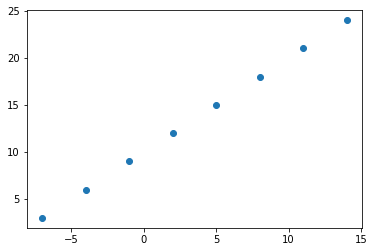

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#creating features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
#creating labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## input and output shapes


In [4]:
#creating a demo tensor for housing prediction model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([937000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
#turning numpy arrays into tensors

In [8]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modleing wiht TF
###Create Model
###Compile Model: Loss and Optimization
###Fitting a model

In [10]:
#Set Random Seed
tf.random.set_seed(42)

#1. Create. model using sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)




Epoch 1/5
1/1 [==============================] - 1s 713ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [11]:
#Check out X and Y
X, y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
#make a prediction using model
y_pred = model.predict([17.0])

In [13]:
y_pred + 11

array([[23.71602]], dtype=float32)

#Improving models performance

In [14]:
#rebuilding the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (training for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 415ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 

In [15]:
#Reminder of Data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
#model evaluation once again
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [17]:
#rebuilding model with a different neural network
#rebuilding the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (training for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 679ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 12ms/s

In [18]:
#model evaluation once again
model.predict([17.0])

array([[31.223137]], dtype=float32)

##Common ways to improve a model
###Adding Layers
###Increase the number of hidden neurons
###Change activation function
###Change optimization function
###Change Learning Rate


In [19]:
#rebuilding model with a different learning rate
#rebuilding the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])

#3. Fit the model (training for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 576ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 12.7255 - mae: 12.7255
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.7171 - mae: 12.7171
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 12.7087 - mae: 12.7087
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.7003 - mae: 12.7003
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6919 - mae: 12.6919
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6834 - mae: 12.6834
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6750 - mae: 12.6750
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6666 - mae: 12.6666
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6582 - mae: 12.6582
Epoch 11/100
1/1 [==============================]

##Evaluating a Model

In practice a typical workflow youll go thorugh when building nn is:
buld a model -> fit model -> evaluate -> tweak and repeat

In [20]:
#rebuilding the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

#3. Fit the model (training for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 911ms/step - loss: 13.2296 - mae: 13.2296
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1890 - mae: 13.1890
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 13.1483 - mae: 13.1483
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 13.1076 - mae: 13.1076
Epoch 5/100
1/1 [==============================] - 0s 29ms/step - loss: 13.0670 - mae: 13.0670
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0263 - mae: 13.0263
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9856 - mae: 12.9856
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9448 - mae: 12.9448
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 12.9039 - mae: 12.9039
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 12.8634 - mae: 12.8634
Epoch 11/100
1/1 [==============================] - 0s 12ms/

###When it comes to evaluating models: Visualize, Visualize and Visualize

#Its a good ideaa to visualize:
- The Data
- The model
- The training
- The predictions

In [21]:
#Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

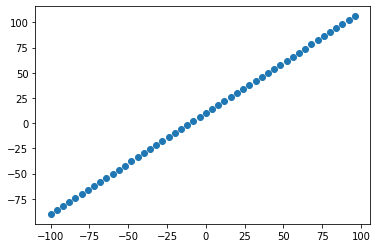

In [23]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets
- Training (model learns from this data) 70-80%
- Validation set (the model gets tuned on this data, which is typicall 10-15%
- Test Set (model gets evaluated on this set, 10-15%)

In [24]:
#Check the length of how mahy sammples we have
len(X), len(y)

(50, 50)

In [25]:
#split the data into train and test
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]
len(X_train), len(y_test)

(40, 10)

#Lets visualize our data 


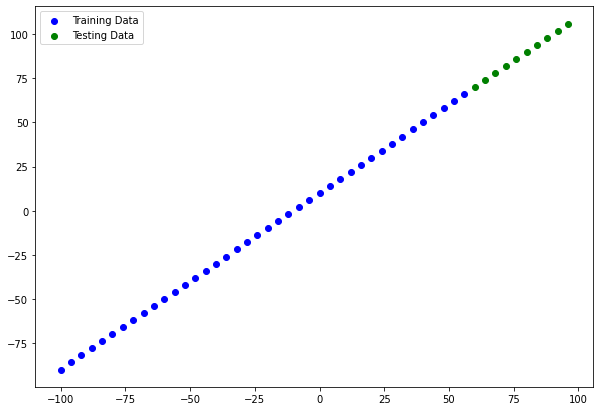

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")
plt.legend()

#How to build a neural network for the data


In [27]:
#rebuilding the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1,)
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (training for longer)
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [28]:
##Visualizing the model

In [41]:
#Creatint a model which builds automatically based on input shape
tf.random.set_seed(42)

#create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1]),
  tf.keras.layers.Dense(1, name="output_layer")                 
])

#2. Compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model (training for longer)
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [42]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


#Total Params = Total number of parameters in the model
#Trainable Parametrs - these are the parameters or patters that the model can update as it trains
#Non-trainable parameters- these parameters are not updated during training, comonly used when you bring in already learn patters or parametrs during transfer learning

In [43]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

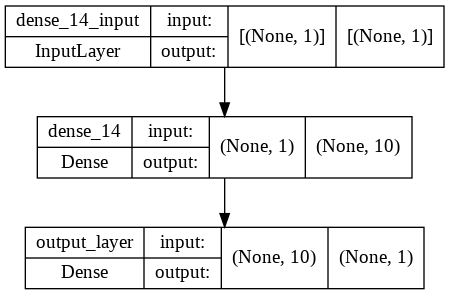

In [45]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

#Visualizing the models predictions

In [47]:
#making predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [48]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

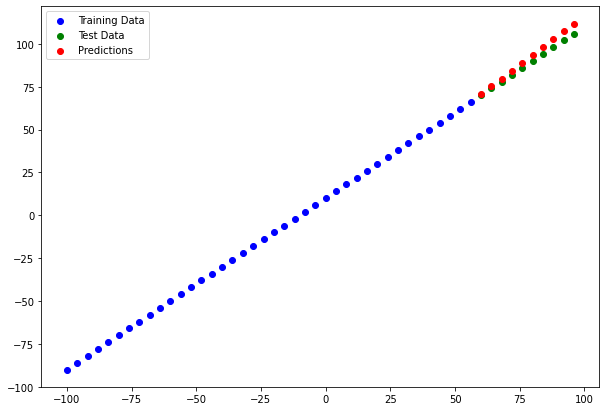

In [51]:
#Lets create a plotting function
def plot_predictions(
    train_data = X_train, 
    train_labels = y_train, 
    test_data=X_test, 
    test_labels=y_test, 
    predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

plot_predictions()


In [52]:
#Evaluation Metrics
#Retruns loss and evaluation metric
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 177ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [60]:
y_pred = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [57]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [58]:
#Calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [63]:
y_pred = tf.squeeze(y_pred)

In [64]:
#Calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [66]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [76]:
#making functions for mae and mse
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                     y_pred=tf.squeeze(y_pred))
def mse(y_true, y_test):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                     y_pred=tf.squeeze(y_pred))

###Running experiements to improve model

In [69]:
#Three modeling experiments
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [71]:
tf.random.set_seed(42)

#create 1st model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

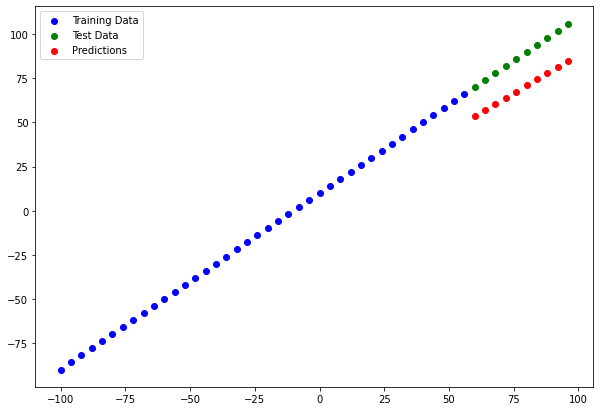

In [72]:
#Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [78]:
#Calculate evaluations metrics
mae_1 = mae(y_test, (y_preds_1))
mse_1 = mse(y_test, (y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

In [81]:
tf.random.set_seed(42)

#create 2nd model with 100 hidden units
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(100)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 40.1504 - mae: 40.1504
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 39.9948 - mae: 39.9948
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 39.8037 - mae: 39.8037
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 39.5905 - mae: 39.5905
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 39.3402 - mae: 39.3402
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 39.0650 - mae: 39.0650
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 38.7490 - mae: 38.7490
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 38.3521 - mae: 38.3521
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 37.8211 - mae: 37.8211
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 37.2500 - mae: 37.2500
Epoch 11/100
2/2 [==============================] - 0s 7ms/

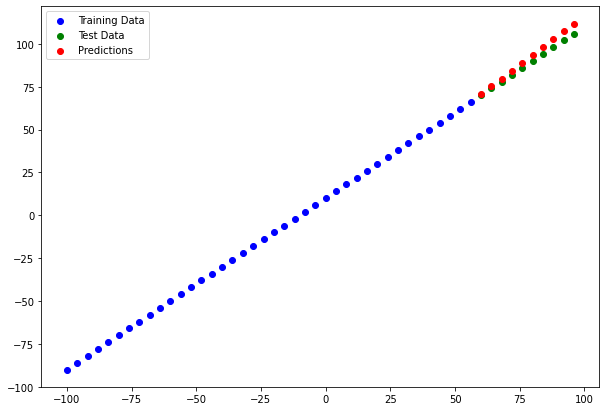

In [80]:
plot_predictions(predictions=y_pred)

ValueError: ignored

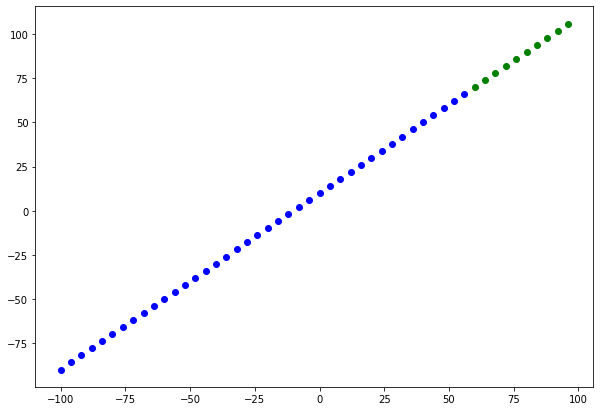

In [82]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [83]:
#calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

InvalidArgumentError: ignored

In [85]:
tf.random.set_seed(42)

#create 3rd model with 2 layers and 500 epochs
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 6m

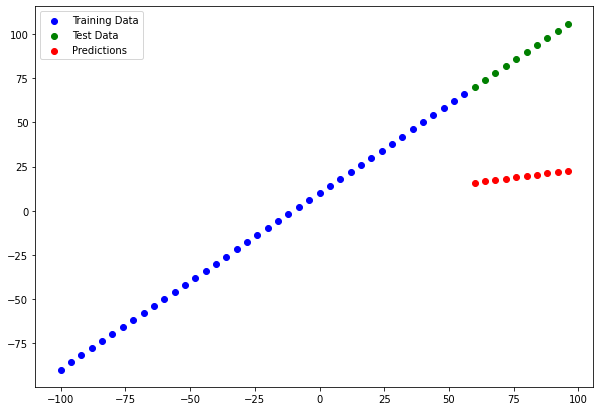

In [86]:
#make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [88]:
#Calcualte model 3 eval metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)